## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        #第一層接收input_layer
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        #其他層接收上一層
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    
    #建立模型
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    #優化演算法
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    #Loss
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    #lr名稱代號
    exp_name_tag = "exp-lr-%s" % str(lr)
    #利用dictionary儲存各個lr的loss
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.8290 - acc: 0.3473 - val_loss: 1.7348 - val_acc: 0.3868
Epoch 2/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5982 - acc: 0.4342 - val_loss: 1.7055 - val_acc: 0.4115
Epoch 3/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.5071 - acc: 0.4663 - val_loss: 1.5377 - val_acc: 0.4486
Epoch 4/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.4462 - acc: 0.4877 - val_loss: 1.4540 - val_acc: 0.4841
Epoch 5/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.3994 - acc: 0.5020 - val_loss: 1.4511 - val_acc: 0.4880
Epoch 6/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.3530 - acc: 0.5201 - val_loss: 1.4312 - val_acc: 0.486734 - acc
Epoch 7/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.3227 - acc: 0.5284 - val_loss: 1.4354

Epoch 2/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.8120 - acc: 0.3618 - val_loss: 1.7703 - val_acc: 0.3831
Epoch 3/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.7276 - acc: 0.3930 - val_loss: 1.6983 - val_acc: 0.4086
Epoch 4/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.6697 - acc: 0.4143 - val_loss: 1.6581 - val_acc: 0.4198
Epoch 5/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.6232 - acc: 0.4296 - val_loss: 1.6155 - val_acc: 0.4343
Epoch 6/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.5847 - acc: 0.4449 - val_loss: 1.5817 - val_acc: 0.4407
Epoch 7/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.5509 - acc: 0.4554 - val_loss: 1.5649 - val_acc: 0.4483
Epoch 8/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.5204 - acc: 0.4670 - val_loss: 1.5324 - val_acc: 0.4594
Epoch 9/50
50000/50000 [=================

50000/50000 [==============================] - 5s 94us/step - loss: 2.2417 - acc: 0.1842 - val_loss: 2.2323 - val_acc: 0.1882 2.
Epoch 5/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.2244 - acc: 0.1987 - val_loss: 2.2161 - val_acc: 0.2008
Epoch 6/50
50000/50000 [==============================] - 4s 86us/step - loss: 2.2086 - acc: 0.2089 - val_loss: 2.2009 - val_acc: 0.2122
Epoch 7/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.1940 - acc: 0.2175 - val_loss: 2.1865 - val_acc: 0.2234
Epoch 8/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.1800 - acc: 0.2248 - val_loss: 2.1727 - val_acc: 0.2308
Epoch 9/50
50000/50000 [==============================] - 4s 86us/step - loss: 2.1666 - acc: 0.2327 - val_loss: 2.1594 - val_acc: 0.2373
Epoch 10/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.1538 - acc: 0.2396 - val_loss: 2.1470 - val_acc: 0.2455loss: 
Epoch 11/50
50000/50000 [=================

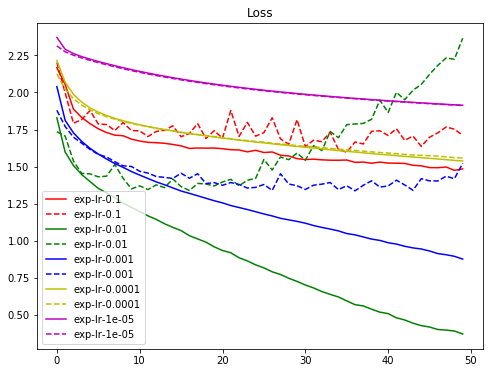

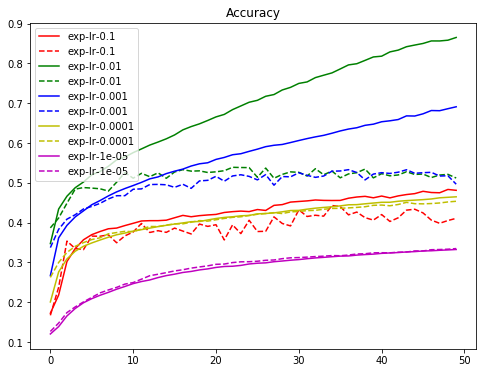

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    
    #劃出各個lr的曲線(實線train-loss) label為dictionary的key color依照enumerate給予0,1,2...值
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    #虛線(valid-loss)
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [9]:
def build_mlp(input_shape, output_unit=10, num=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n in enumerate(num):
        if i == 0:
            x = keras.layers.Dense(units=n, activation='relu', name = 'hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n, activation='relu', name = 'hidden_layer'+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_unit, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])  
    
    return model

In [10]:
"""Code Here
設定超參數
"""
learning_rate = [0.01]
epochs = 50
batch_size = 256
MOMENTUM = [0.95, 0.65]
NESTEROV = [True, False]

In [13]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for n in NESTEROV:
    for i, momentum in enumerate(MOMENTUM):

        keras.backend.clear_session()
        print("Experiment with Momentum = %.6f & Nesterov = %s" % (momentum, str(n)))

        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()

        optimizer = keras.optimizers.SGD(lr = learning_rate, nesterov=n, momentum=momentum)
        model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=epochs, batch_size=batch_size,
                  validation_data = (x_test, y_test),
                  shuffle = True)

        train_loss = model.history.history['loss']
        val_loss = model.history.history['val_loss']
        train_acc = model.history.history['acc']
        val_acc = model.history.history['val_acc']
        
        exp_name_tag = "exp-momentum-%s-nesterov-%s" % (str(momentum), str(n))
            

        results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': val_loss,
                             'train-acc': train_acc,
                             'valid-acc': val_acc}


Experiment with Momentum = 0.950000 & Nesterov = True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.9687 - acc: 0.2944 - val_loss: 1.8625 - val_acc: 0.3322
Epoch 2/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.7895 - acc: 0.3654 - val_loss: 1.7814 - val_acc: 0.3742
Epoch 3/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.7115 - acc: 0.3948 - val_loss: 1.7067 - val_acc: 0.3910
Epoch 4/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.6598 - acc: 0.4113 - val_loss: 1.6530 - val_acc: 0.4062
Epoch 5/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.6101 - acc: 0.4316 - val_loss: 1.7202 - val_acc: 0.3786
Epoch 6/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.5744 - acc: 0.4423 - val_loss: 1.6191 - val_acc: 0.4273
Epoch 7/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.5388 - acc: 0.4578 - val_loss: 1.6077 - 

50000/50000 [==============================] - 8s 162us/step - loss: 1.7681 - acc: 0.3760 - val_loss: 1.7931 - val_acc: 0.3526
Epoch 3/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.6866 - acc: 0.4032 - val_loss: 1.6563 - val_acc: 0.4115
Epoch 4/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.6289 - acc: 0.4236 - val_loss: 1.5987 - val_acc: 0.4374
Epoch 5/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.5860 - acc: 0.4402 - val_loss: 1.6114 - val_acc: 0.4177
Epoch 6/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.5506 - acc: 0.4507 - val_loss: 1.5819 - val_acc: 0.4381
Epoch 7/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.5206 - acc: 0.4643 - val_loss: 1.5077 - val_acc: 0.4622
Epoch 8/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.4878 - acc: 0.4761 - val_loss: 1.5456 - val_acc: 0.4529
Epoch 9/50
50000/50000 [=====================

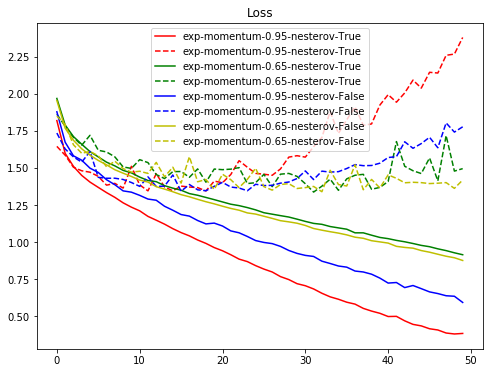

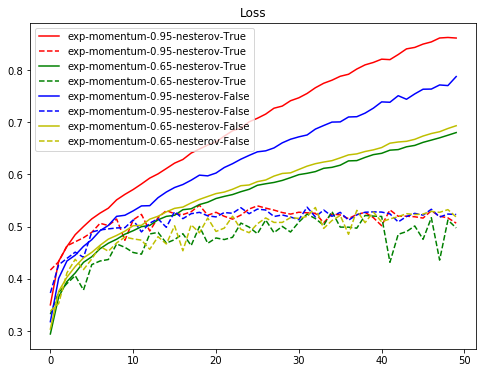

In [14]:
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))

for i, cond in enumerate(results.keys()):
    
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))

for i, cond in enumerate(results.keys()):
    
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    
plt.title('Loss')
plt.legend()
plt.show()